In [34]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%pylab inline

data=pd.read_excel('itemSat-Nov-04-15_46_56-2017.xlsx')

def price_cleanup(dataframe):
    price_orig_list = dataframe.price.as_matrix()
    for _ in xrange(len(price_orig_list)):
        string=price_orig_list[_]
        string =string.replace(',','')
        string=string.replace(u'租金波動','')
        string=string.strip()
        #print "%s - %s "% (price_orig_list[_],string)
        price_orig_list[_]=float(string)
       
    #print price_orig_list
    #numeric_price=pd.to_numeric(pd.Series(price_orig_list))
    #print numeric_price
    dataframe.price=pd.to_numeric(dataframe.price)
    #print dataframe.price

def area_cleanup(dataframe):
    area_list=dataframe.area.as_matrix()
    for _ in xrange(len(area_list)):
        string=area_list[_]
        string=string.replace(u'坪','')
        string=string.strip()
        #print string
        area_list[_]=float(string)
    #area_series=pd.Series(area_list)
    dataframe.area=pd.to_numeric(dataframe.area)
    

house_types=set(data.house_type)
room_types=set(data.room_type)
#check price
#  use to_numic will fail
price_cleanup(data)
#print data.head()
print "====house_types"
for _ in house_types:print _
print "====room_types"
for _ in room_types:print _
#print data.price.head
#data.price=pd.to_numeric(data.price)

area_cleanup(data)
print data.head()

Populating the interactive namespace from numpy and matplotlib
====house_types
整層住家
獨立套房
分租套房
車位
雅房
其他
====room_types
電梯大樓
nan
華廈
店面（店鋪）
住宅大樓
倉庫
辦公商業大樓
透天厝
公寓
  house_type room_type  price  area  floor            address update_time  \
0       獨立套房        公寓   7800     8  4F/5F     新北市三重區重陽路二段25號       12分鐘內   
0       獨立套房        公寓  11800     6  5F/5F      新北市新莊區中正路334巷       13分鐘內   
0       分租套房        公寓  10800     7  2F/5F  新北市土城區學成路166巷1弄6號       13分鐘內   
0       獨立套房      電梯大樓   9000     7  4F/8F          新北市淡水區中山路       13分鐘內   
0       整層住家        公寓  17000    25  4F/5F  新北市三重區大同北路115巷20號       13分鐘內   

          due                                               link gender fee  \
0  2017-11-05   https://rent.591.com.tw/rent-detail-5670819.h...  男女生皆可  --   
0  2017-11-11   https://rent.591.com.tw/rent-detail-5688499.h...  男女生皆可   無   
0  2017-11-30   https://rent.591.com.tw/rent-detail-5744472.h...  男女生皆可   0   
0  2017-11-10   https://rent.591.com.tw/rent-detail-5686287.h.

In [35]:


room_dataframes={}
for each in house_types:
    room_dataframes[each]=data[data.house_type==each]

for _ in room_dataframes: print _

整層住家
獨立套房
分租套房
車位
雅房
其他


In [58]:
def analyze_room(room_type,dataframe):
    print "[[[%s]]]" % room_type
    print "%s -area/price, price/area" %(room_type )
    df= dataframe
    #print df.head()
    npa=df.price.as_matrix()
    plt.figure()
    subplot(2,1,1)
    #plt.ylabel(u'穴穴')
    #plt.plot(range(len(df)),npa)  
    plt.hist(df.area.as_matrix(),100)
    #plt.show()
    subplot(2,1,2)

    plt.hist(npa,100)
    plt.figure()
    plt.scatter(df.area.as_matrix(),df.price.as_matrix())
    plt.xlabel(u'area')
    plt.ylabel(u'price')
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

[[[整層住家]]]
整層住家 -area/price, price/area


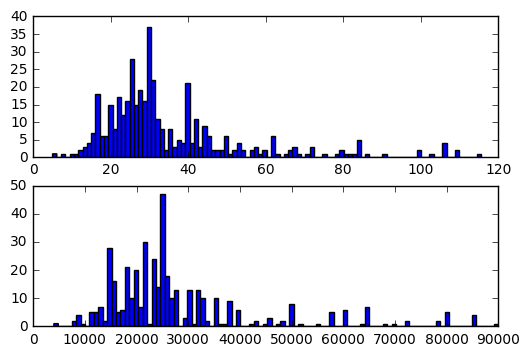

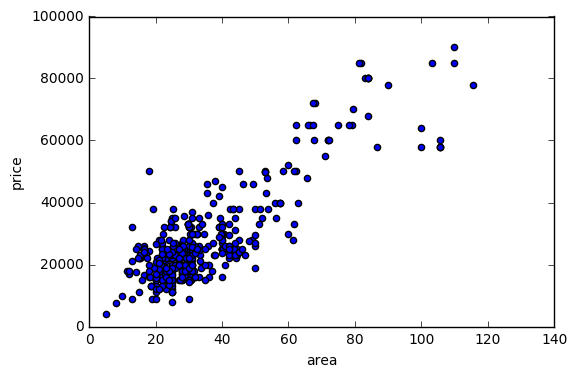

[[[獨立套房]]]
獨立套房 -area/price, price/area


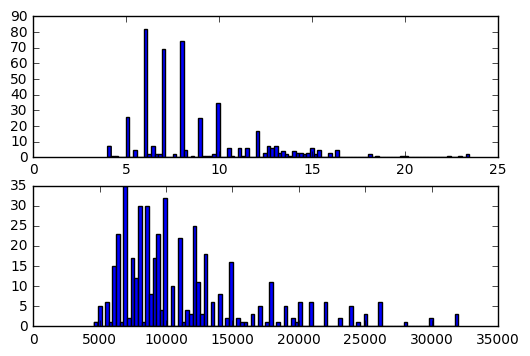

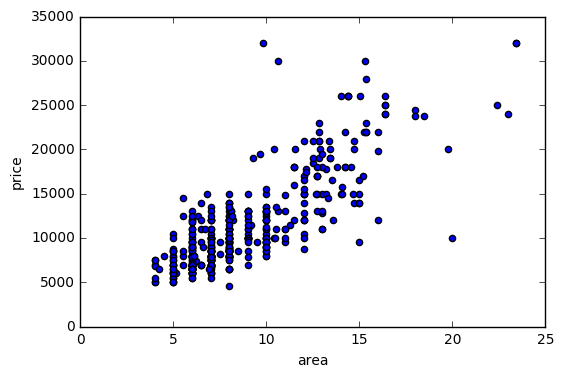

[[[分租套房]]]
分租套房 -area/price, price/area


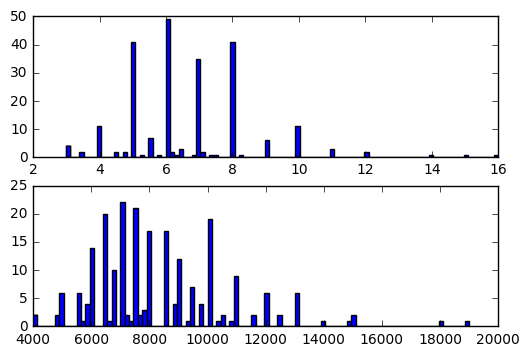

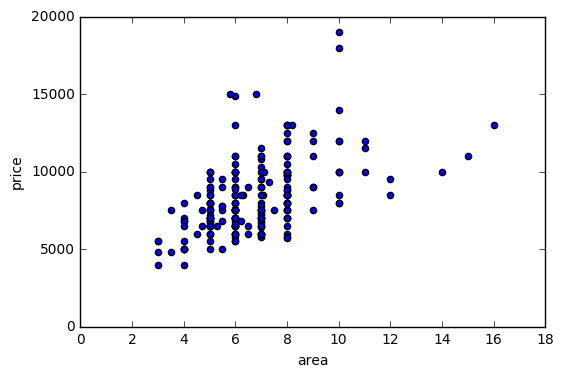

[[[雅房]]]
雅房 -area/price, price/area


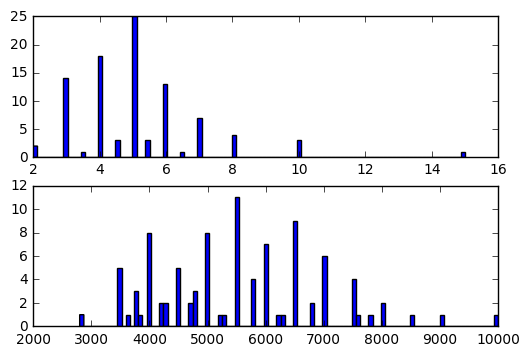

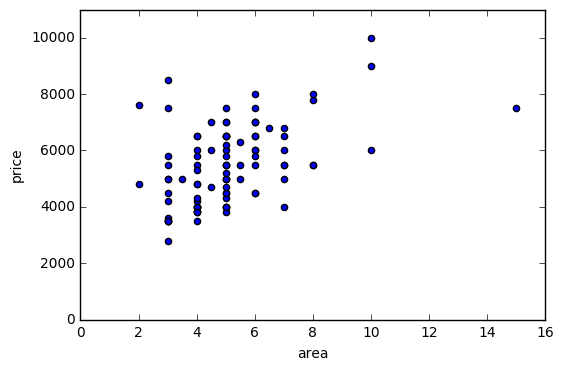

In [60]:
for each in room_dataframes:
    if each==u'車位' or each==u'其他' :continue
    analyze_room(each,room_dataframes[each])
    #y=room_dataframes[each].price.as_matrix()
    #x=range(len(room_dataframes[each]))
    #print type(y)
    #plt.plot(y)

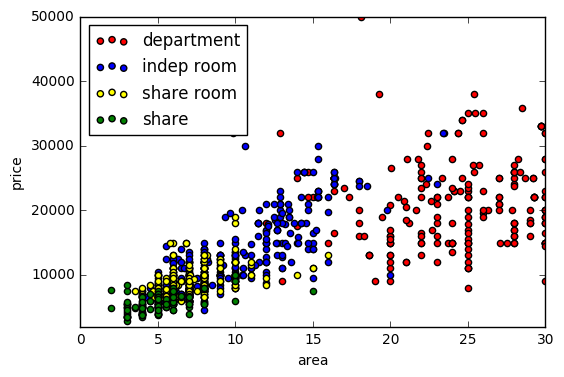

In [70]:
plt.figure()
df= room_dataframes[u'整層住家']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='red',label='department')
df= room_dataframes[u'獨立套房']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='blue',label='indep room')
df= room_dataframes[u'分租套房']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='yellow',label='share room')
df= room_dataframes[u'雅房']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='green',label='share')
plt.xlabel('area')
plt.ylabel('price')
plt.xlim(0,30)
plt.ylim(2000,50000)
plt.legend(loc ='upper left')
plt.show()

====統計:獨立套房 ========
電梯大樓 blue 137
住宅大樓 red 5
透天厝 green 39
公寓 yellow 283


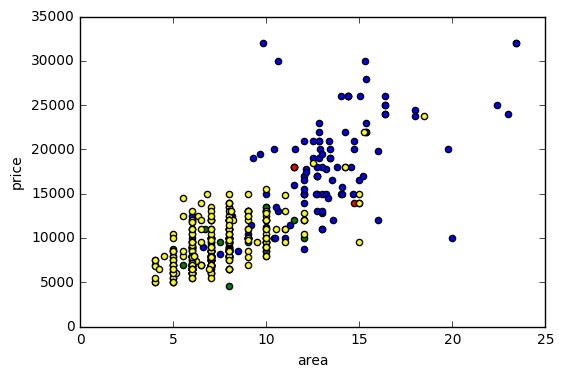

In [91]:
#for _ in house_types: print _
#for _ in room_types: print _
print u"====統計:%s ========" % u'獨立套房' 
df= room_dataframes[u'獨立套房']
#print df.head()
house_types_dic={}
for each in room_types:
    house_types_dic[each]=df[df.room_type==each]
    #print each,house_types_dic[each]
count=0
colors=['blue','red','green','yellow','black']
for each in house_types_dic:
    if  each != u'住宅大樓' and each != u'透天厝' and each !=u'公寓' and each!=u'電梯大樓':continue #each != u'華廈' and 
    each_df=house_types_dic[each]
    print each, colors[count] ,len(each_df)
    plt.scatter(each_df.area.as_matrix(),each_df.price.as_matrix(),c=colors[count])
    count+=1
plt.xlabel(u"area")
plt.ylabel(u'price')
plt.show()

====統計:分租套房 ========
電梯大樓 blue 17
住宅大樓 red 1
透天厝 green 16
公寓 yellow 198


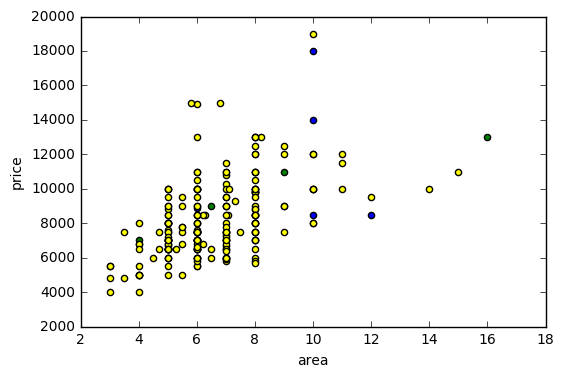

In [93]:
#for _ in house_types: print _
#for _ in room_types: print _
print u"====統計:%s ========" % u'分租套房' 
df= room_dataframes[u'分租套房']
#print df.head()
house_types_dic={}
for each in room_types:
    house_types_dic[each]=df[df.room_type==each]
    #print each,house_types_dic[each]
count=0
colors=['blue','red','green','yellow','black']
for each in house_types_dic:
    if  each != u'住宅大樓' and each != u'透天厝' and each !=u'公寓' and each!=u'電梯大樓':continue #each != u'華廈' and 
    each_df=house_types_dic[each]
    print each, colors[count] ,len(each_df)
    plt.scatter(each_df.area.as_matrix(),each_df.price.as_matrix(),c=colors[count])
    count+=1
plt.xlabel(u"area")
plt.ylabel(u'price')
plt.show()

====統計:整層住家 ========
電梯大樓 blue 215
住宅大樓 red 7
透天厝 green 19
公寓 yellow 178


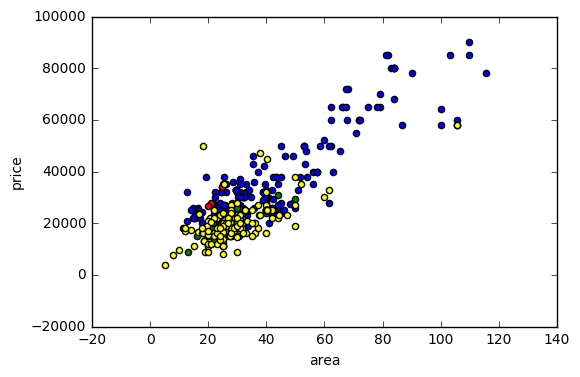

In [94]:
#for _ in house_types: print _
#for _ in room_types: print _
print u"====統計:%s ========" % u'整層住家' 
df= room_dataframes[u'整層住家']
#print df.head()
house_types_dic={}
for each in room_types:
    house_types_dic[each]=df[df.room_type==each]
    #print each,house_types_dic[each]
count=0
colors=['blue','red','green','yellow','black']
for each in house_types_dic:
    if  each != u'住宅大樓' and each != u'透天厝' and each !=u'公寓' and each!=u'電梯大樓':continue #each != u'華廈' and 
    each_df=house_types_dic[each]
    print each, colors[count] ,len(each_df)
    plt.scatter(each_df.area.as_matrix(),each_df.price.as_matrix(),c=colors[count])
    count+=1
plt.xlabel(u"area")
plt.ylabel(u'price')
plt.show()

In [96]:
def room_by_house_type(name,dataframe_room):
    print u"====統計:%s ========" % name 
    df= dataframe_room
    #print df.head()
    house_types_dic={}
    for each in room_types:
        house_types_dic[each]=df[df.room_type==each]
        #print each,house_types_dic[each]
    count=0
    colors=['blue','red','green','yellow','black']
    for each in house_types_dic:
        if  each != u'住宅大樓' and each != u'透天厝' and each !=u'公寓' and each!=u'電梯大樓':continue #each != u'華廈' and 
        each_df=house_types_dic[each]
        print each, colors[count] ,len(each_df)
        plt.scatter(each_df.area.as_matrix(),each_df.price.as_matrix(),c=colors[count])
        count+=1
    plt.xlabel(u"area")
    plt.ylabel(u'price')
    plt.show()

In [97]:
def analyze_room2(room_type,dataframe):
    print "[[[%s]]]" % room_type
    print "%s -area/price, price/area" %(room_type )
    df= dataframe
    #print df.head()
    npa=df.price.as_matrix()
    plt.figure()
    subplot(2,1,1)
    #plt.ylabel(u'穴穴')
    #plt.plot(range(len(df)),npa)  
    plt.hist(df.area.as_matrix(),100)
    #plt.show()
    subplot(2,1,2)

    plt.hist(npa,100)
    plt.show()
    room_by_house_type(room_type, dataframe)
    '''
    plt.figure()
    plt.scatter(df.area.as_matrix(),df.price.as_matrix())
    plt.xlabel(u'area')
    plt.ylabel(u'price')
    plt.xlim(0)
    plt.ylim(0)
    plt.show()    
    '''


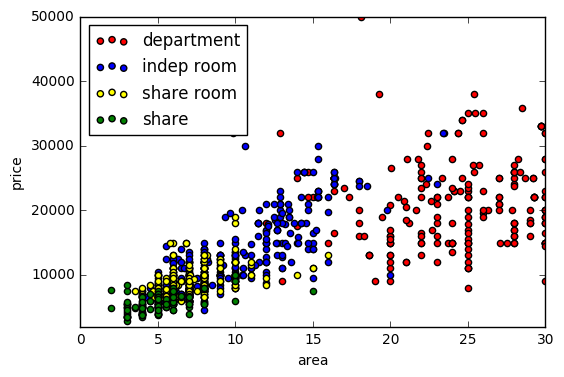

[[[整層住家]]]
整層住家 -area/price, price/area


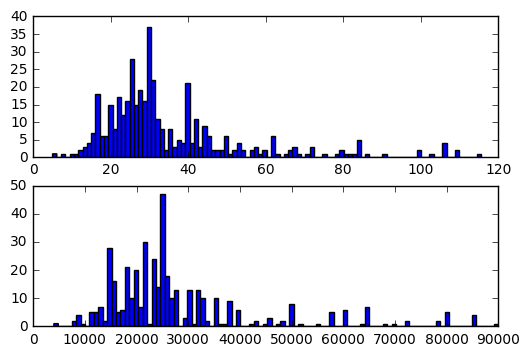

====統計:整層住家 ========
電梯大樓 blue 215
住宅大樓 red 7
透天厝 green 19
公寓 yellow 178


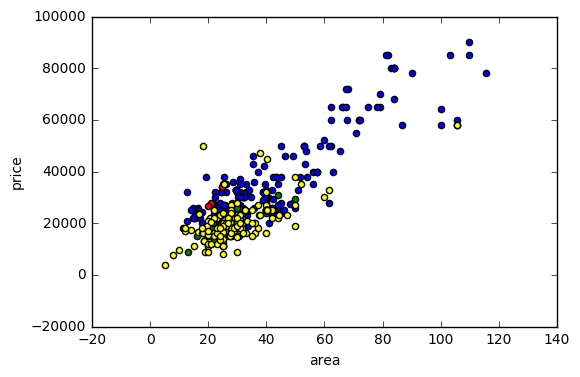

[[[獨立套房]]]
獨立套房 -area/price, price/area


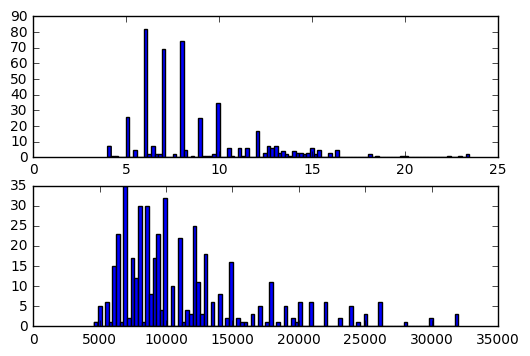

====統計:獨立套房 ========
電梯大樓 blue 137
住宅大樓 red 5
透天厝 green 39
公寓 yellow 283


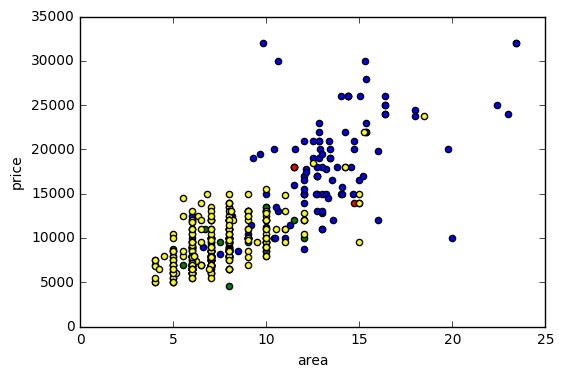

[[[分租套房]]]
分租套房 -area/price, price/area


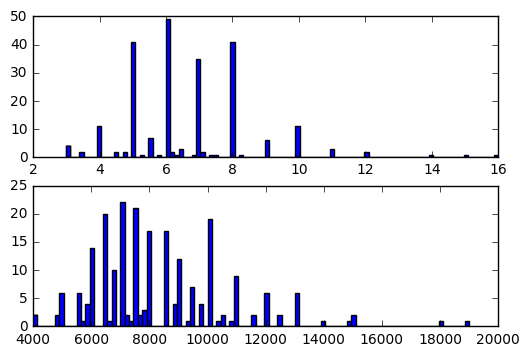

====統計:分租套房 ========
電梯大樓 blue 17
住宅大樓 red 1
透天厝 green 16
公寓 yellow 198


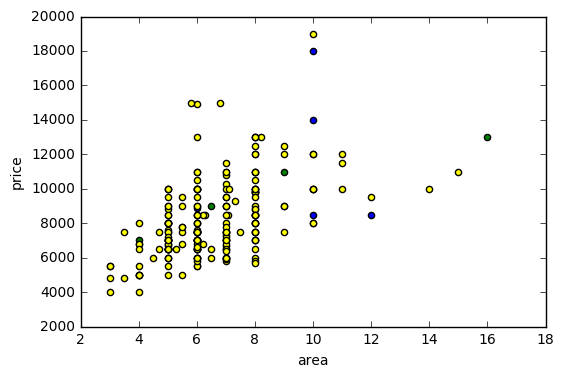

[[[雅房]]]
雅房 -area/price, price/area


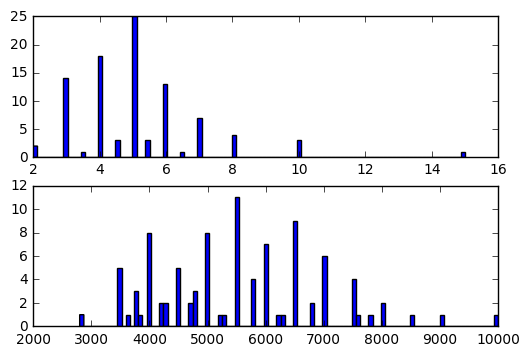

====統計:雅房 ========
電梯大樓 blue 12
住宅大樓 red 0
透天厝 green 8
公寓 yellow 75


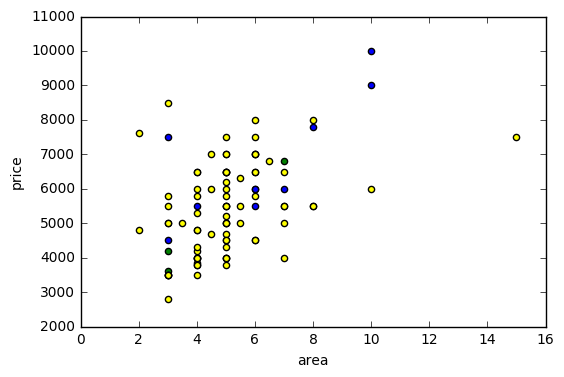

In [100]:
plt.figure()
df= room_dataframes[u'整層住家']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='red',label='department')
df= room_dataframes[u'獨立套房']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='blue',label='indep room')
df= room_dataframes[u'分租套房']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='yellow',label='share room')
df= room_dataframes[u'雅房']
plt.scatter(df.area.as_matrix(),df.price.as_matrix(),c='green',label='share')
plt.xlabel('area')
plt.ylabel('price')
plt.xlim(0,30)
plt.ylim(2000,50000)
plt.legend(loc ='upper left')
plt.show()

for each in room_dataframes:
    if each==u'車位' or each==u'其他' :continue
    analyze_room2(each,room_dataframes[each])

In [147]:
data[(data.house_type==u'獨立套房') | (data.house_type==u'雅房' )]

,house_type,room_type,price,area,floor,address,update_time,due,link,gender,fee,phone
0,獨立套房,公寓,7800,8.00,4F/5F,新北市三重區重陽路二段25號,12分鐘內,2017-11-05,https://rent.591.com.tw/rent-detail-5670819.h...,男女生皆可,--,NaN
0,獨立套房,公寓,11800,6.00,5F/5F,新北市新莊區中正路334巷,13分鐘內,2017-11-11,https://rent.591.com.tw/rent-detail-5688499.h...,男女生皆可,無,NaN
0,獨立套房,電梯大樓,9000,7.00,4F/8F,新北市淡水區中山路,13分鐘內,2017-11-10,https://rent.591.com.tw/rent-detail-5686287.h...,女生,--,NaN
0,獨立套房,公寓,8500,8.00,2F/4F,新北市林口區工六路6巷8號,13分鐘內,2017-11-30,https://rent.591.com.tw/rent-detail-5747594.h...,男女生皆可,無,NaN
0,獨立套房,公寓,10000,8.00,5F/5F,新北市三重區仁政街54巷,18分鐘內,2017-11-07,https://rent.591.com.tw/rent-detail-5675740.h...,男女生皆可,無,NaN
0,獨立套房,透天厝,8700,5.00,5F/5F,新北市板橋區南雅南路一段,18分鐘內,2017-11-30,https://rent.591.com.tw/rent-detail-5746066.h...,男女生皆可,--,NaN
0,獨立套房,公寓,9500,6.00,4F/5F,新北市板橋區漢生西路89巷,23分鐘內,2017-11-20,https://rent.591.com.tw/rent-detail-5718776.h...,女生,--,NaN
0,獨立套房,公寓,7500,7.00,3F/5F,新北市三重區大同北路190巷2號,28分鐘內,2017-11-15,https://rent.591.com.tw/rent-detail-5702649.h...,男女生皆可,無,NaN
0,獨立套房,電梯大樓,9600,6.00,5F/5F,新北市汐止區明峰街,34分鐘內,2017-11-30,https://rent.591.com.tw/rent-detail-5745888.h...,女生,--,NaN
0,獨立套房,電梯大樓,12819,13.00,14F/21F,新北市淡水區中正東路一段137號,34分鐘內,2017-11-25,https://rent.591.com.tw/rent-detail-5733536.h...,男女生皆可,1224元/月,NaN
